In [1]:
import os
os.chdir("../")

In [2]:
from comchoice.voting import Voting
from comchoice.datasets import load_synthetic_election
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [82]:
df = load_synthetic_election(
    aggregate=False,
    candidates=["A", "B", "C", "D", "E"],
    n_voters=5,
    random_state=22
)

df.head()

,rank,voter
0,B>E>A>D>C,1
1,A>C>E>D>B,2
2,A>C>D>E>B,3
3,A>E>C>B>D,4
4,D>B>A>C>E,5


In [83]:
choice = Voting(df)
order = list(choice.borda()["candidate"])

In [84]:
choice.borda()

,candidate,value,rank
0,A,16,1
2,C,9,2
4,E,9,3
1,B,8,4
3,D,8,5


In [85]:
df["candidate"] = df["rank"].str.split(">")

In [86]:
df = df.explode("candidate")

df

,rank,voter,candidate
0,B>E>A>D>C,1,B
0,B>E>A>D>C,1,E
0,B>E>A>D>C,1,A
0,B>E>A>D>C,1,D
0,B>E>A>D>C,1,C
1,A>C>E>D>B,2,A
1,A>C>E>D>B,2,C
1,A>C>E>D>B,2,E
1,A>C>E>D>B,2,D
1,A>C>E>D>B,2,B


In [87]:
df["value"] = df.groupby("voter").cumcount() + 1
df["voter"] = df["voter"].astype(str)
df = df.reset_index()
df

,index,rank,voter,candidate,value
0,0,B>E>A>D>C,1,B,1
1,0,B>E>A>D>C,1,E,2
2,0,B>E>A>D>C,1,A,3
3,0,B>E>A>D>C,1,D,4
4,0,B>E>A>D>C,1,C,5
5,1,A>C>E>D>B,2,A,1
6,1,A>C>E>D>B,2,C,2
7,1,A>C>E>D>B,2,E,3
8,1,A>C>E>D>B,2,D,4
9,1,A>C>E>D>B,2,B,5


{'A': 0, 'C': 1, 'E': 2, 'B': 3, 'D': 4}


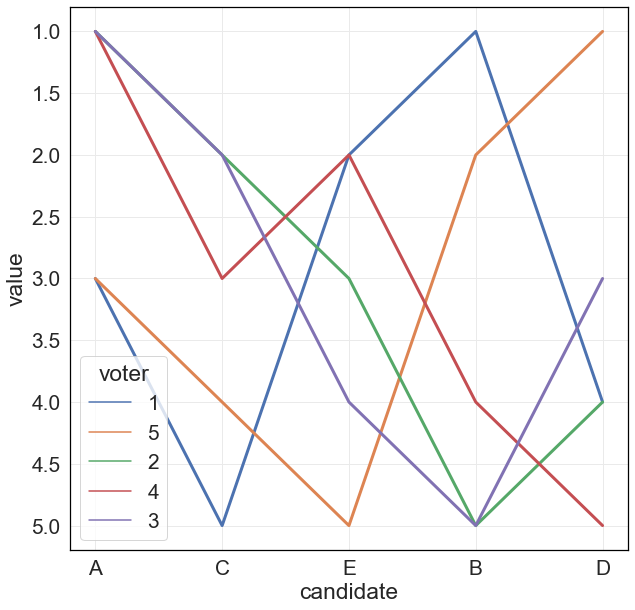

In [94]:
sns.set(font_scale=1.9, rc={"figure.figsize": (10, 10)}, style="whitegrid")
matplotlib.rc("axes", edgecolor="#000000")
matplotlib.rc("grid", color="#eaeaea")
plt.rcParams["font.family"] = "Arial"
plt.rcParams["svg.fonttype"] = "none"
def make_sorter(l):
    """
    Create a dict from the list to map to 0..len(l)
    Returns a mapper to map a series to this custom sort order
    """
    sort_order = {k:v for k,v in zip(l, range(len(l)))}
    print(sort_order)
    return lambda s: s.map(lambda x: sort_order[x])
g = sns.lineplot(x="candidate", y="value", lw=3, hue="voter", data=df.sort_values("candidate", key=make_sorter(order)))
# g = sns.scatterplot(x="candidate", s=150, y="rank", lw=3, hue="voter", data=df)
# _ = g.set_xticklabels(order)
g.invert_yaxis()